<font color='blue'>
    <h1 align=center>TP — ACP d’un jeu de données sur les performances d’athlètes olympiques</h1>
          </font>

<h2 align=center>CentraleSupélec-OpenClassrooms Certifiyng Training</h2>

<h3 align=center>Jean Martial Tagro </h3>

In [2]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Importation des données et préparation

In [3]:
data = pd.read_csv('decathlon.txt', sep='\t')

In [4]:
data.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [5]:
# éliminer les colonnes que nous n'utiliserons pas
my_data = data.drop(['Points', 'Rank', 'Competition'], axis=1)

# transformer les données en array numpy
X = my_data.values

In [6]:
# Standardisation
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

### 2. Calcul des composantes principales

Calculons maintenant les deux premières composantes principales :

In [8]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

print(pca)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


### 3. Pourcentage de variance expliquée

<strong>pca.explained_variance_ratio_</strong> nous donne le pourcentage de variance expliquée par chacune des composantes.

In [9]:
print(pca.explained_variance_ratio_)

[0.32719055 0.1737131 ]


#### La première composante explique environ un tiers de la variance observée dans les données et la deuxième 17.3%. Au total, ces deux composantes <br><br>expliquent 50% de la variance totale, en utilisant seulement un cinquième des dimensions initiales.

Nous pouvons représenter chaque athlète/compétition selon ces deux dimensions uniquement, et colorer chacun des points correspondant en fonction du classement de l'athlète lors de cette compétition.

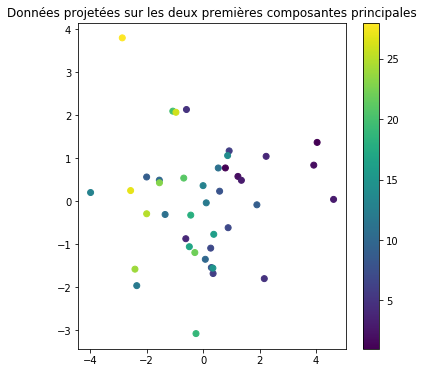

In [17]:
# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

plt.figure(figsize=(6,6))

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # colorer en utilisant la variable 'Rank'
    c=data.get('Rank'))

plt.title('Données projetées sur les deux premières composantes principales')
#plt.xlim([-5.5, 5.5])
#plt.ylim([-4, 4])

plt.colorbar()
plt.show()

### 4. Contribution de chaque variable aux composantes principales

Pour mieux comprendre ce que capture ces composantes principales, nous pouvons utiliserpca.components_, qui nous donne les coordonnées des composantes principales dans l'espace initial (celui à 10 variables). Nous allons afficher, pour chacune des 10 performances, un point dont l'abscisse sera sa contribution à la première PC et l'ordonnée sa contribution à la deuxième PC.

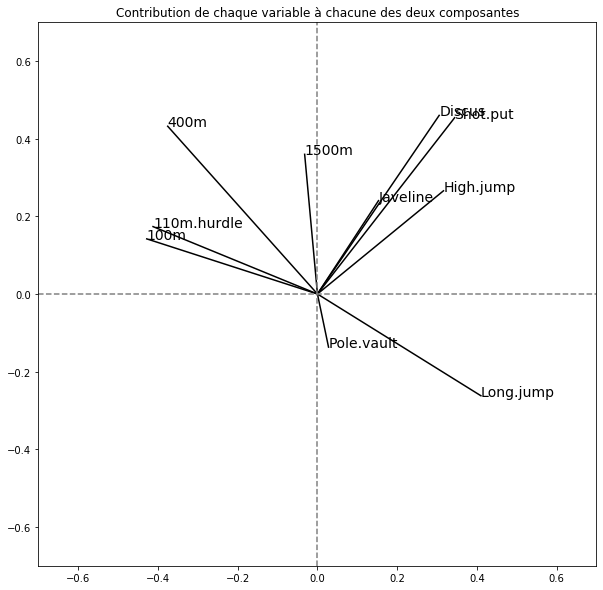

In [21]:
pcs = pca.components_

plt.figure(figsize=(10,10))

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])
plt.title('Contribution de chaque variable à chacune des deux composantes')
plt.show()

Les variables qui ont une contribution négative à la première composante principale correspondent aux disciplines pour lesquelles une bonne performance est représentée par un petit nombre (temps de course), et inversement pour les variables ayant une contribution positive. Cette composante permet de séparer les athlètes qui ont de très bonnes performances de ceux qui sont (relativement !) plus mauvais dans toutes les disciplines, comme nous l'avions remarqué.

La deuxième composante principale permet de séparer les athlètes plus forts (bonnes performances aux lancers) et moins endurants (basse performance aux 400m et 1500m) des autres.

Ce graphique nous permet aussi d'observer que certaines variables sont très corrélées, commeDiscus (performance au lancer de disque) etShot put (performance au lancer de poids).

### Résumé
L'ACP nous a permis de :

représenter les données en deux dimensions ;
établir des profils des athlètes ;
mettre à jour des corrélations entre des variables.

---